In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Load and randomly preview the dataset.
df = pd.read_csv('nba_player_stats.csv')
df.sample(15)

,YEAR,SEASON_TYPE,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
461,2014-15,Regular Season,202328,44,Greg Monroe,1610612765,DET,69,31.0,6.1,12.4,0.496,0.0,0.0,0.000,3.7,4.9,0.750,3.3,6.9,10.2,2.1,1.1,0.5,2.2,15.9,20.2
1648,2016-17,Playoffs,101114,125,Deron Williams,1610612739,CLE,18,14.6,1.6,3.6,0.438,0.7,1.7,0.387,0.6,0.6,0.909,0.2,1.1,1.3,2.1,0.6,0.1,0.9,4.3,5.3
59,2013-14,Regular Season,202699,60,Tobias Harris,1610612753,ORL,61,30.3,5.4,11.7,0.464,0.5,2.1,0.254,3.2,4.0,0.807,1.4,5.5,7.0,1.3,0.7,0.4,1.3,14.6,15.7
1560,2016-17,Playoffs,202328,37,Greg Monroe,1610612749,MIL,6,23.5,4.5,8.5,0.529,0.0,0.0,0.000,4.2,5.0,0.833,2.8,4.5,7.3,1.7,1.3,0.5,1.8,13.2,17.3
2136,2018-19,Regular Season,1629028,54,Deandre Ayton,1610612756,PHX,71,30.7,7.2,12.3,0.585,0.0,0.1,0.000,2.0,2.7,0.746,3.1,7.1,10.3,1.8,0.9,0.9,1.8,16.3,22.6
1814,2017-18,Regular Season,101107,137,Marvin Williams,1610612766,CHA,78,25.7,3.3,7.2,0.458,1.6,3.9,0.413,1.3,1.6,0.829,0.9,3.8,4.7,1.2,0.7,0.5,0.8,9.5,11.7
2265,2018-19,Regular Season,203090,183,Maurice Harkless,1610612757,POR,60,23.6,3.2,6.5,0.487,0.6,2.0,0.275,0.8,1.2,0.671,1.3,3.2,4.5,1.2,1.1,0.9,0.8,7.7,10.9
2790,2019-20,Playoffs,203497,34,Rudy Gobert,1610612762,UTA,7,38.6,6.9,10.6,0.649,0.0,0.0,0.000,3.1,6.0,0.524,3.4,8.0,11.4,1.1,0.6,1.4,1.3,16.9,23.6
2592,2019-20,Regular Season,203552,97,Seth Curry,1610612742,DAL,64,24.6,4.4,9.0,0.495,2.3,5.0,0.452,1.3,1.5,0.825,0.4,1.8,2.3,1.9,0.6,0.1,1.0,12.4,11.6
306,2013-14,Playoffs,201571,48,D.J. Augustin,1610612741,CHI,5,28.2,4.2,14.4,0.292,1.4,5.2,0.269,3.4,3.8,0.895,0.8,0.8,1.6,4.8,0.6,0.0,1.8,13.2,7.8


In [21]:
df.dtypes

YEAR           category
SEASON_TYPE      object
PLAYER_ID         int64
PLAYER           object
TEAM_ID           int64
TEAM             object
GP                int64
MIN             float64
FGM             float64
FGA             float64
FG_PCT          float64
FG3M            float64
FG3A            float64
FG3_PCT         float64
FTM             float64
FTA             float64
FT_PCT          float64
OREB            float64
DREB            float64
REB             float64
AST             float64
STL             float64
BLK             float64
TOV             float64
PTS             float64
EFF             float64
Cluster           int32
dtype: object

## Cleaning and Analysis Preparation

In [6]:
df.isna().sum()

YEAR           0
SEASON_TYPE    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PTS            0
EFF            0
dtype: int64

In [7]:
df.drop(columns='RANK', inplace=True)

In [8]:
df.TEAM.unique()

array(['OKC', 'NYK', 'MIA', 'MIN', 'HOU', 'LAC', 'GSW', 'POR', 'SAC',
       'TOR', 'CHA', 'IND', 'DAL', 'CLE', 'NOP', 'PHX', 'WAS', 'ORL',
       'ATL', 'PHI', 'MIL', 'LAL', 'DEN', 'MEM', 'BOS', 'SAS', 'DET',
       'UTA', 'BKN', 'CHI'], dtype=object)

## Descriptive Analysis

### Trend Analysis of Player Performance Over the Years
This analysis can help understand how the performance (e.g., Points Per Game) of players changes over the years.

In [9]:
# Ensure 'YEAR' is treated as a categorical variable with ordered categories
df['YEAR'] = pd.Categorical(df['YEAR'], categories=sorted(df['YEAR'].unique()), ordered=True)

# Calculate the average points per game by year
avg_points_per_year = df.groupby('YEAR', observed=False)['PTS'].mean().reset_index()

# Use Plotly to create an interactive line chart
fig = px.line(avg_points_per_year, x='YEAR', y='PTS', markers=True, 
              title='Average Points Per Game Over the Years',
              labels={'YEAR': 'Year', 'PTS': 'Points Per Game'},
              template='plotly_dark') # Apply Dark Theme
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Points Per Game',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(tickmode='linear'))

# Show the plot
fig.show()

### Comparative Analysis: Regular Season vs Playoffs
Compare metrics such as points, assists, and rebounds during regualr seasons and playoffs. 

In [10]:
# Group by 'SEASON_TYPE' and calculate the mean for selected stats
season_comparison = df.groupby('SEASON_TYPE')[['PTS', 'AST', 'REB']].mean().reset_index()

# Use Plotly to create an interactive bar chart with a dark theme
fig = px.bar(season_comparison, x='SEASON_TYPE', y=['PTS', 'AST', 'REB'],
             title='Average Stats Comparison: Regular Season vs Playoffs',
             labels={'value': 'Average', 'variable': 'Statistics'},
             template='plotly_dark')

fig.update_layout(xaxis_title='Season Type',
                  yaxis_title='Average',
                  legend_title_text='Statistics')

# Show the plot
fig.show()

### Statistical Summaries
Generate descriptive statistics for different metrics.

In [11]:
# Descriptive statistics for points
points_desc = df['PTS'].describe()
print("Descriptive Statistics for Points Per Game:")
print(points_desc)

# Points Distribution per Game.
fig = px.histogram(df, x='PTS', nbins=20, title='Distribution of Points Per Game',
                   labels={'PTS': 'Points Per Game'}, template='plotly_dark')

fig.update_layout(xaxis_title='Points Per Game',
                  yaxis_title='Frequency',
                  bargap=0.2)  # Adjust the gap between bars to ensure clear visualization

# Show the plot
fig.show()

Descriptive Statistics for Points Per Game:
count    4293.000000
mean       11.307873
std         6.480626
min         0.000000
25%         6.600000
50%         9.900000
75%        14.700000
max        37.400000
Name: PTS, dtype: float64


### Correlation Analysis Between Stats
Examine how different stats like assists and rebounds correlate with points.

Correlation Matrix:
             PTS       AST       REB    FG_PCT
PTS     1.000000  0.663250  0.487165  0.123769
AST     0.663250  1.000000  0.205750 -0.059351
REB     0.487165  0.205750  1.000000  0.411306
FG_PCT  0.123769 -0.059351  0.411306  1.000000


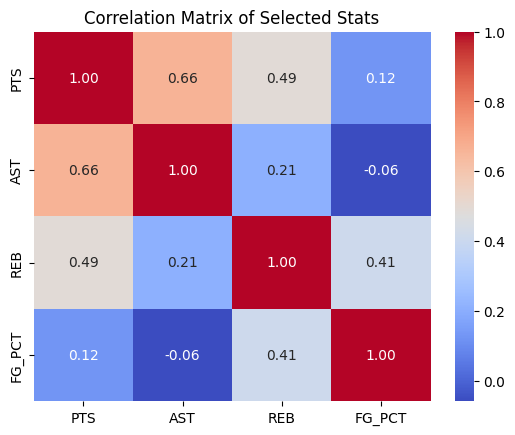

In [12]:
import seaborn as sns

# Correlation matrix for selected stats
correlation_matrix = df[['PTS', 'AST', 'REB', 'FG_PCT']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Stats')
plt.show()


###  Descriptive Analysis
Exploring the dataset to understand the distributions of various statistics and get a sense of the data.

* Data Overview: Displays the structure and summary statistics of the dataset.
* Visualization: Histograms for points and assists per game to visualize the distribution and understand the skewness or outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   YEAR         4293 non-null   category
 1   SEASON_TYPE  4293 non-null   object  
 2   PLAYER_ID    4293 non-null   int64   
 3   PLAYER       4293 non-null   object  
 4   TEAM_ID      4293 non-null   int64   
 5   TEAM         4293 non-null   object  
 6   GP           4293 non-null   int64   
 7   MIN          4293 non-null   float64 
 8   FGM          4293 non-null   float64 
 9   FGA          4293 non-null   float64 
 10  FG_PCT       4293 non-null   float64 
 11  FG3M         4293 non-null   float64 
 12  FG3A         4293 non-null   float64 
 13  FG3_PCT      4293 non-null   float64 
 14  FTM          4293 non-null   float64 
 15  FTA          4293 non-null   float64 
 16  FT_PCT       4293 non-null   float64 
 17  OREB         4293 non-null   float64 
 18  DREB         4293 non-null  

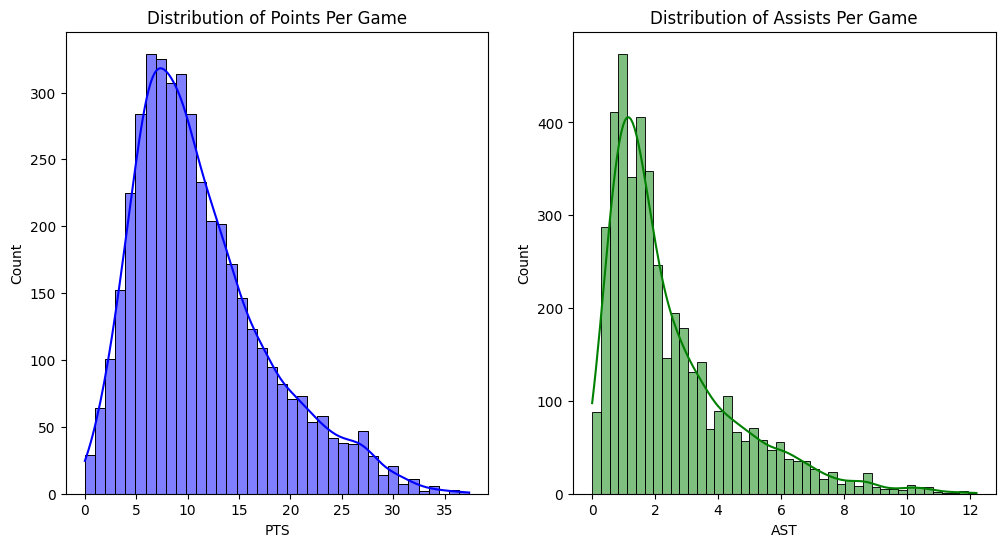

In [13]:
# Display basic information and statistical summary
print(df.info())

# Visualize distribution of key statistics like Points and Assists
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['PTS'], kde=True, color='blue')
plt.title('Distribution of Points Per Game')

plt.subplot(1, 2, 2)
sns.histplot(df['AST'], kde=True, color='green')
plt.title('Distribution of Assists Per Game')
plt.show()

### Player Efficiency Analysis
* Scatter Plot: Examines the relationship between minutes played and efficiency, colored by points per game, indicating how scoring and playing time influence efficiency.

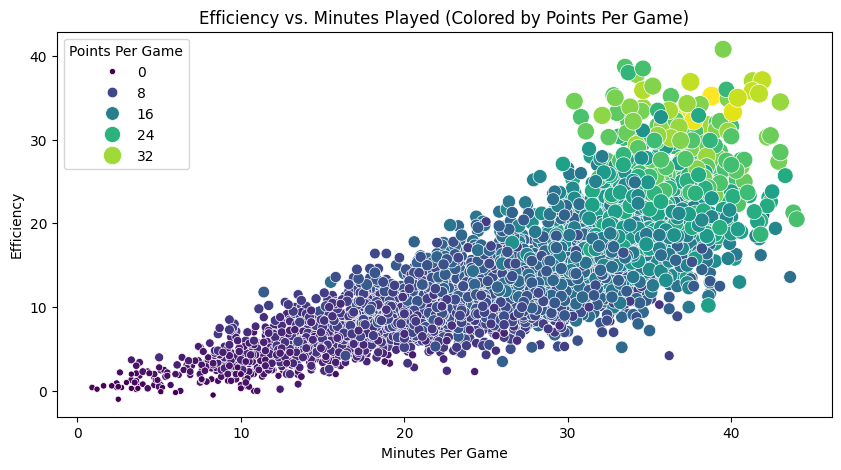

In [14]:
# Analyzing relationship between efficiency, minutes played, and points scored
plt.figure(figsize=(10, 5))
sns.scatterplot(x='MIN', y='EFF', hue='PTS', data=df, palette='viridis', size='PTS', sizes=(20, 200))
plt.title('Efficiency vs. Minutes Played (Colored by Points Per Game)')
plt.xlabel('Minutes Per Game')
plt.ylabel('Efficiency')
plt.legend(title='Points Per Game')
plt.show()


>Develop a bar chart to compare the top 5 players based on their average points per game in the most recent season:
Data Filtering: The code first identifies the most recent season from the data and filters the DataFrame to only include statistics from that season.
Top 5 Players Identification: It then identifies the top 5 players based on their points per game.
Bar Chart Visualization: A bar chart is created to display these top players and their scoring averages, providing a clear visual comparison.

In [15]:
# Filtering the data for the most recent season
latest_season = df['YEAR'].max()
latest_season_data = df[df['YEAR'] == latest_season]

# Finding the top 5 players based on average points per game
top_players = latest_season_data.nlargest(5, 'PTS')

# Finding the top 5 players based on average points per game
top_players = latest_season_data.nlargest(5, 'PTS')

# Plotting the results using plotly.express
fig = px.bar(top_players, x='PLAYER', y='PTS',
             title=f'Top 5 Players by Points Per Game - {latest_season}',
             labels={'PTS': 'Average Points Per Game', 'PLAYER': 'Player'},
             color='PLAYER',  # Use the player names to color the bars
             color_discrete_sequence=px.colors.qualitative.Plotly,  # Using Plotly's qualitative colors
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)  # Rotate the x-axis labels for better visibility
fig.show()


## Advanced Analysis

### Advanced Trend Analysis with Ploynomial Fitting.
* Player Trend Analysis: Focusing on a high-profile player like Luka Doncic, this script analyzes how his scoring has trended over the years.
* Polynomial Regression: This method fits a non-linear model to the points data, which could reveal insights into peak performance years or declines.

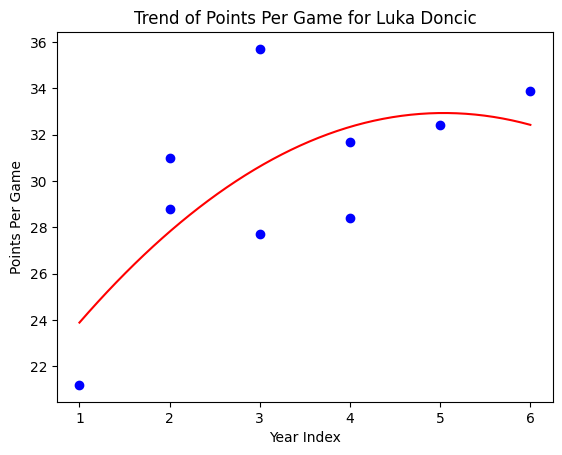

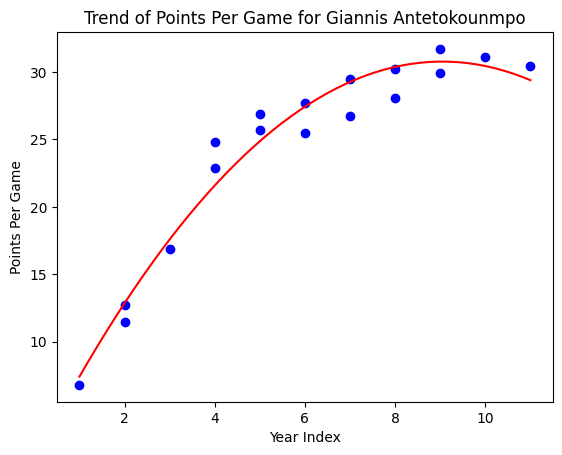

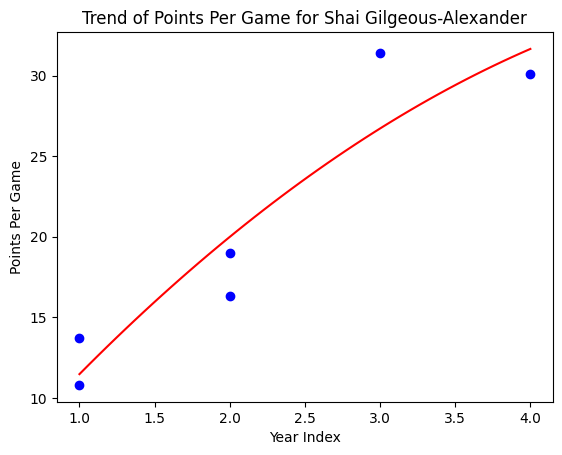

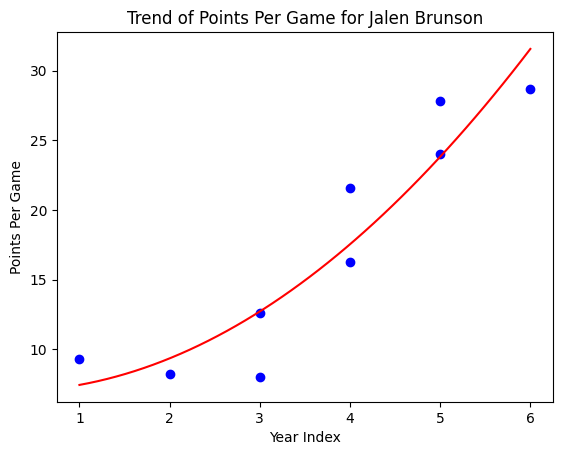

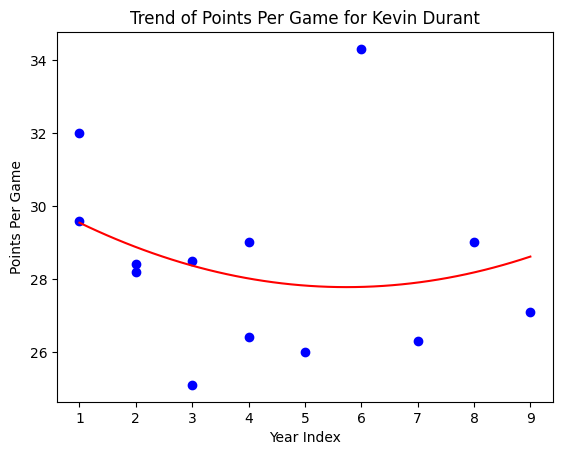

In [16]:
from numpy.polynomial.polynomial import polyfit

players = ['Luka Doncic', 'Giannis Antetokounmpo', 'Shai Gilgeous-Alexander', 'Jalen Brunson', 'Kevin Durant']

for player in players:
    # Check if player data exists
    if player not in df['PLAYER'].values:
        print(f"No data available for {player}. Skipping...")
        continue
    
    # Focus on a single player to analyze trends over the years
    player_stats = df[df['PLAYER'] == player].copy()

    # Ensure there is enough data to fit a polynomial
    if len(player_stats) < 3:
        print(f"Not enough data points for {player} to fit a polynomial. Skipping...")
        continue

    # Convert 'YEAR' to a numerical format that can be used for regression
    player_stats['Year_Index'] = pd.factorize(player_stats['YEAR'])[0] + 1

    # Fit a polynomial curve
    coefs = polyfit(player_stats['Year_Index'], player_stats['PTS'], 2)
    
    # Generate x values for the polynomial curve (based on Year_Index)
    x = np.linspace(player_stats['Year_Index'].min(), player_stats['Year_Index'].max(), num=50)
    ffit = np.polyval(coefs[::-1], x)  # Calculate polynomial values at x

    # Plot
    plt.scatter(player_stats['Year_Index'], player_stats['PTS'], color='blue')
    plt.plot(x, ffit, color='red')  # Plot the polynomial curve
    plt.title(f'Trend of Points Per Game for {player}')
    plt.xlabel('Year Index')
    plt.ylabel('Points Per Game')
    plt.show()


### Player Performance Clustering
Using clustering (e.g., K-means) to segment players into groups based on performance stats like points, assists, and rebounds.
* Feature Selection and Normalization: Essential for effective clustering.
* KMeans Clustering: Segments players into groups that could represent different roles or performance levels.
* Visualization: Uses pair plots to visually examine how the clusters are formed based on the selected stats.

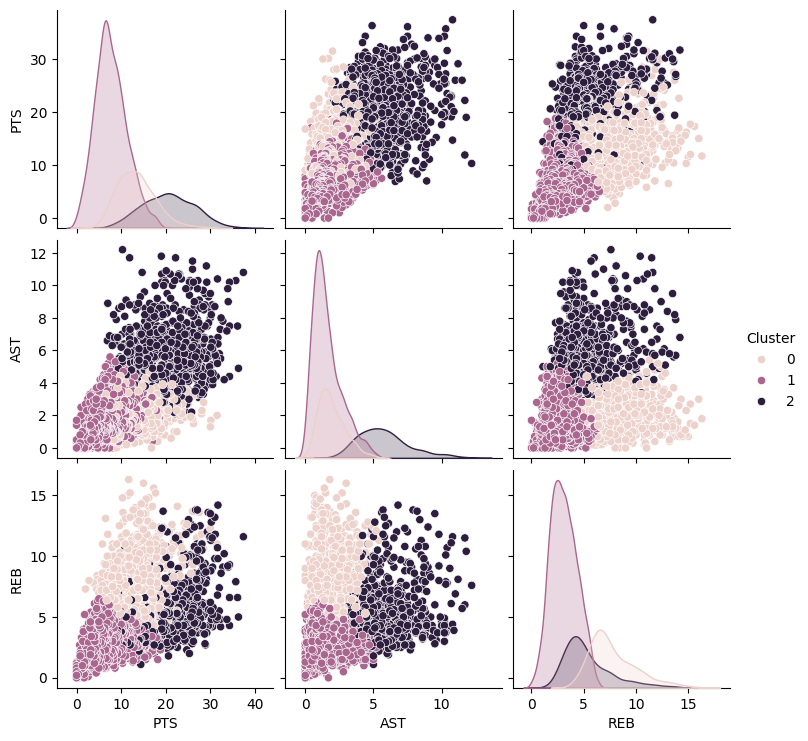

In [17]:
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['PTS', 'AST', 'REB']]

# Normalize features
features_scaled = (features - features.mean()) / features.std()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(features_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Plot the clusters
sns.pairplot(df, hue='Cluster', vars=['PTS', 'AST', 'REB'])
plt.show()

### Predictive Modeling for Future Player Performance
Predict future performance using a linear regression model based on a player's past statistics.
* Predictive Model: Uses multiple linear regression to forecast player scoring based on various performance indicators.
* Model Evaluation: Assesses the accuracy of the predictions using mean squared error and plots actual vs. predicted values to visualize prediction accuracy.

Mean Squared Error: 10.887151099906625


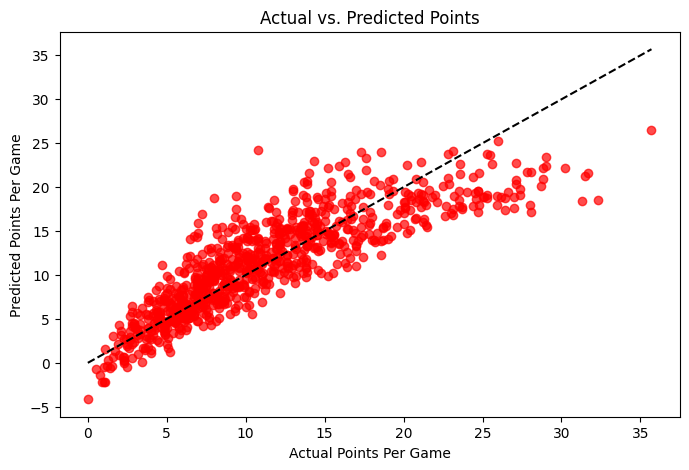

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing data for modeling
features = df[['MIN', 'AST', 'REB', 'FG_PCT']]
target = df['PTS']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visual comparison of actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions, alpha=0.7, color='red')
plt.xlabel('Actual Points Per Game')
plt.ylabel('Predicted Points Per Game')
plt.title('Actual vs. Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


Mean Squared Error: 9.76350616947624


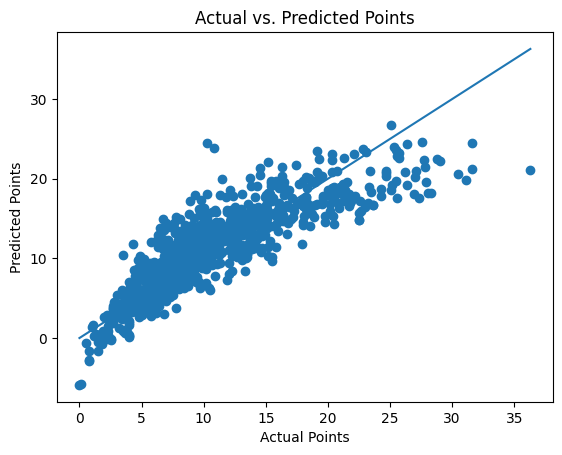

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare dataset
X = df[['MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK']]  # predictors
y = df['PTS']  # target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
predictions = model.predict(X_test)

# Calculate and print the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs predicted
plt.scatter(y_test, predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()
